## **SML FINAL PROJECT: FNN ON Wisconsin Breast Cancer Dataset**
### Author - Pranav Ramesh Bidare
---
This file contains the implementation of 2 layer FNN on Wisconsin Breast Cancer Dataset.
All the cells in the file must be executed in the same order for the code to run without any errors. When training the FNN using the best parameters we have to feed in the best hyperparameters in the k-fold validation stage and to get the model summary.


Installing and importing all necessary packages.

In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt

from scikeras.wrappers  import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np

Importing and Pre-processing the dataset. We are replacing the labels into 0 and 1. We are splitting the dataset into training and testing (0.8 and 0.2).
We are also scaling the training data, then using the same mean and variance and scaling the test data.

In [ ]:
from ucimlrepo import fetch_ucirepo

def load_dataset():
  # fetch dataset
  breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

  # data (as pandas dataframes)
  X = breast_cancer_wisconsin_diagnostic.data.features
  y = breast_cancer_wisconsin_diagnostic.data.targets

  # metadata
  print(breast_cancer_wisconsin_diagnostic.metadata)

  # variable information
  print(breast_cancer_wisconsin_diagnostic.variables)
  return X, y

In [ ]:
def preprocess(features, labels):
  # Display Metadata
  features.isnull().sum()

  # Extract features into X
  X = features.copy()

  # Extract labels into Y
  y = labels.copy()
  # Assign numerical values to labels
  y.replace(to_replace=['M', 'B'], value=[1, 0], inplace=True)

  sns.set()
  sns.countplot(data=X, x=y.Diagnosis)
  return X, y

In [ ]:
X_raw, y_raw = load_dataset()
X, y = preprocess(X_raw, y_raw)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


Creating the 2 layer FNN model.

In [ ]:
def create_model(neurons, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=30, activation='relu'))
    model.add(Dense(neurons/2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

Finding the best hyperparameters using GridSearchCV.

In [ ]:
# define the parameter range
param_grid = {'model__neurons': [10, 16, 20],
              'batch_size': [4, 16],
              'model__optimizer': ['SGD', 'RMSprop', 'Adam']}

#Define the model using KerasClassifier method.

model = KerasClassifier(model=create_model, epochs=20, verbose=1, neurons = [10, 16, 20], optimizer = ['SGD', 'RMSprop', 'Adam'])

#Provide the metric for KFold crossvalidation.
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=10)


In [ ]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/20
91/91 [==============================] - 1s 2ms/step - loss: 0.5296 - accuracy: 0.7225
Epoch 2/20
91/91 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.9203
Epoch 3/20
91/91 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9231
Epoch 4/20
91/91 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9368
Epoch 5/20
91/91 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9533
Epoch 6/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9670
Epoch 7/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9643
Epoch 8/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9451
Epoch 9/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9588
Epoch 10/20
91/91 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.9615
Epoch 11/20
91/91 [

Obtaining the best hyperparameters and the respective accuracy. Also getting the accuracies for the other combinations of the hyperparameters.

In [ ]:
# summarize results
print("Best accuracy of: %f using %s" % (grid_result.best_score_,
                                         grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy of: 0.975824 using {'batch_size': 4, 'model__neurons': 10, 'model__optimizer': 'SGD'}
0.975824 (0.012815) with: {'batch_size': 4, 'model__neurons': 10, 'model__optimizer': 'SGD'}
0.975824 (0.012815) with: {'batch_size': 4, 'model__neurons': 10, 'model__optimizer': 'RMSprop'}
0.973626 (0.014906) with: {'batch_size': 4, 'model__neurons': 10, 'model__optimizer': 'Adam'}
0.964835 (0.018906) with: {'batch_size': 4, 'model__neurons': 16, 'model__optimizer': 'SGD'}
0.971429 (0.011207) with: {'batch_size': 4, 'model__neurons': 16, 'model__optimizer': 'RMSprop'}
0.973626 (0.013187) with: {'batch_size': 4, 'model__neurons': 16, 'model__optimizer': 'Adam'}
0.973626 (0.011207) with: {'batch_size': 4, 'model__neurons': 20, 'model__optimizer': 'SGD'}
0.975824 (0.010767) with: {'batch_size': 4, 'model__neurons': 20, 'model__optimizer': 'RMSprop'}
0.973626 (0.016447) with: {'batch_size': 4, 'model__neurons': 20, 'model__optimizer': 'Adam'}
0.931868 (0.017582) with: {'batch_size': 16, 'mo

Confusion matrix on the test data for the model using the best hyperparameters.

29/29 [==============================] - 0s 1ms/step
0.9824561403508771


<Axes: >

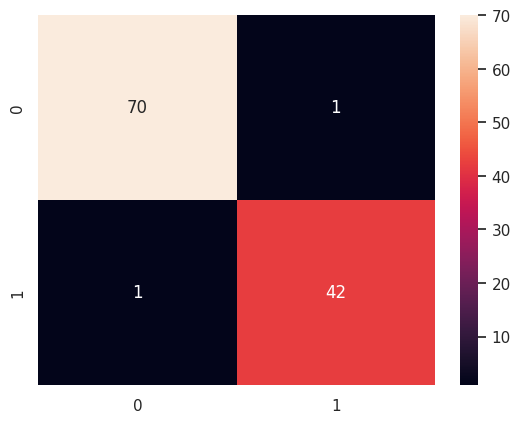

In [ ]:
best_model =grid_result.best_estimator_

# Predicting the Test set results
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
def create_model(neurons, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=30, activation='relu'))
    model.add(Dense(neurons/2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model(10, 'RMSprop')
model.summary()

Model: "sequential_282"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_805 (Dense)           (None, 10)                310       
                                                                 
 dense_806 (Dense)           (None, 5)                 55        
                                                                 
 dropout_282 (Dropout)       (None, 5)                 0         
                                                                 
 dense_807 (Dense)           (None, 1)                 6         
                                                                 
 activation_282 (Activation  (None, 1)                 0         
 )                                                               
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

Using the best hyperparameters, we are using k-fold CV to train the model. We are pklotting training and validation accuracies.

Training for fold 1 ...
Epoch 1/20
91/91 [==============================] - 1s 7ms/step - loss: 0.4330 - accuracy: 0.7885 - val_loss: 0.2779 - val_accuracy: 0.9341
Epoch 2/20
91/91 [==============================] - 0s 4ms/step - loss: 0.2932 - accuracy: 0.8516 - val_loss: 0.2076 - val_accuracy: 0.9451
Epoch 3/20
91/91 [==============================] - 0s 3ms/step - loss: 0.1988 - accuracy: 0.9121 - val_loss: 0.1768 - val_accuracy: 0.9451
Epoch 4/20
91/91 [==============================] - 0s 4ms/step - loss: 0.1767 - accuracy: 0.9231 - val_loss: 0.1602 - val_accuracy: 0.9451
Epoch 5/20
91/91 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9148 - val_loss: 0.1543 - val_accuracy: 0.9451
Epoch 6/20
91/91 [==============================] - 0s 3ms/step - loss: 0.1491 - accuracy: 0.9560 - val_loss: 0.1516 - val_accuracy: 0.9451
Epoch 7/20
91/91 [==============================] - 0s 3ms/step - loss: 0.1385 - accuracy: 0.9588 - val_loss: 0.1515 - val_accuracy: 0.9

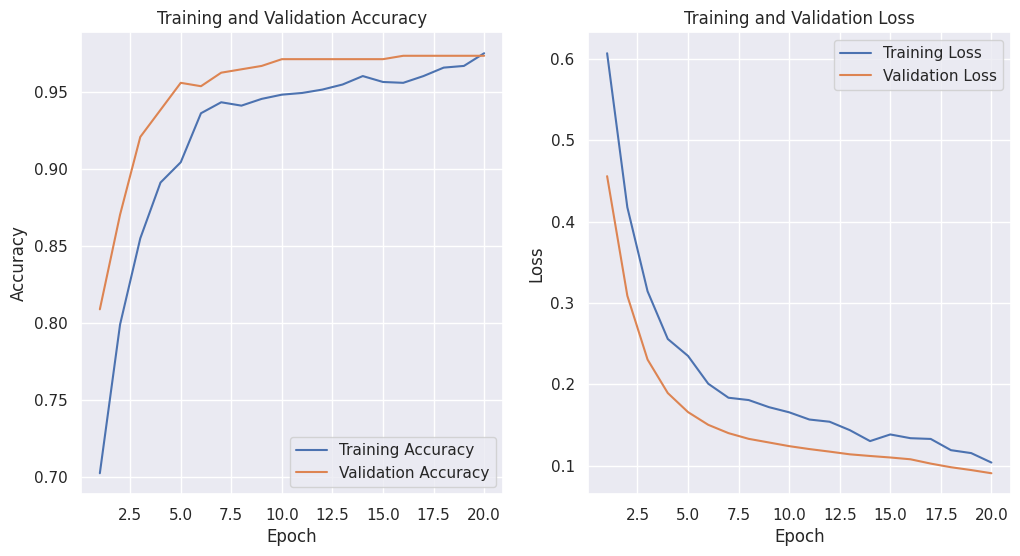

In [ ]:
# Using the parameters from gridsearchCV, buidling the model, training, validating using K-fold and testing it.


acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []
# Training and validating the model

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = [] #save accuracy from each fold

#y_train = y_train.to_numpy()

for train, val in kfold.split(X_train, y_train):

    print(f'Training for fold {fold_no} ...')
    X_training = X_train
    #Call the model in each loop
    model = create_model(10, 'RMSprop')
    history = model.fit(X_training[train], y_train[train],
              batch_size=4,
              epochs=20,
              verbose=1,
              validation_data=(X_training[val], y_train[val]))
    acc_per_fold.append(history.history['accuracy'])
    loss_per_fold.append(history.history['loss'])
    val_acc_per_fold.append(history.history['val_accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])

    # Increase fold number
    fold_no += 1

#plotting the graphs of accuracy and loss for training and validation
acc_per_fold = np.array(acc_per_fold)
loss_per_fold = np.array(loss_per_fold)
val_acc_per_fold = np.array(val_acc_per_fold)
val_loss_per_fold = np.array(val_loss_per_fold)

# Calculate average and standard deviation across folds
mean_acc = np.mean(acc_per_fold, axis=0)
mean_loss = np.mean(loss_per_fold, axis=0)
mean_val_acc = np.mean(val_acc_per_fold, axis=0)
mean_val_loss = np.mean(val_loss_per_fold, axis=0)

epochs_range = range(1,21)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, mean_acc, label='Training Accuracy')
plt.plot(epochs_range, mean_val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, mean_loss, label='Training Loss')
plt.plot(epochs_range, mean_val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Save the figures
plt.savefig('training_validation_accuracy_loss.png')

plt.show()



Confusion matrix for the model trained above.

4/4 [==============================] - 0s 3ms/step
[[70  1]
 [ 1 42]]
0.9824561403508771


<Axes: >

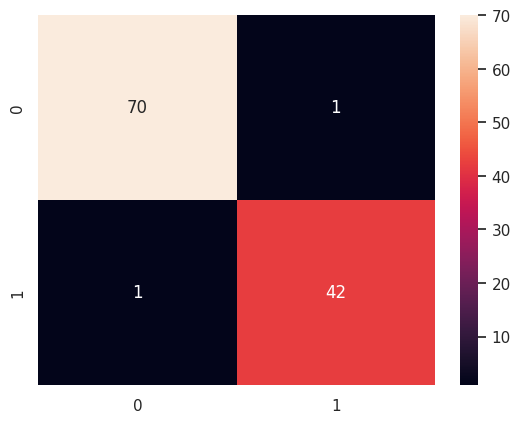

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
sns.heatmap(cm, annot=True)